## Acknowledgement

This notebook presents the practical work that was part of the group project "Kuzushiji Classification" in the Deep Learning course from Prof. Dr. Lippert (Hasso-Plattner-Institut, Germany) in 2022. 

We would like to thank our supervisor H. Shahriar for his support and assistance throughout the whole project development. 

Our project can also be found at GitHub: https://github.com/regnujAx/Deep-Learning-Kanji-Classification

M. S. H. Chowdhury, A. Junger, M. Yakub, M. G. Rasul
(Master students from University Potsdam and Hasso-Plattner-Institut, Germany)

## Import Necessary Scripts and Libraries

In [6]:
# internal scripts
import data_loading, test, train, transfer_learning

# public libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from tensorflow import keras

# Kuzushiji-Kanji Dataset Visualization

In [8]:
# Run this cell to get all images and labels of the Kanji dataset
data_dir = "..\\archive\\kkanji\\kkanji2"

array_of_images = []
dict_of_image_data = {}
for dirpath, dirnames, filenames in os.walk(data_dir):
    label = os.path.basename(dirpath)
    print("label:", label)
    for file in filenames:
        filepath = os.path.join(dirpath, file)
        img = np.array(Image.open(filepath))
        array_of_images.append(img)  
        if label in dict_of_image_data:
            dict_of_image_data[label].append(filepath)
        else:
            dict_of_image_data[label] = [filepath]

np.savez("all_images.npz", array_of_images)

array_of_label_numbers = []
array_of_labels = []
number = -1
for dirpath, dirnames, filenames in os.walk(data_dir):
    label = os.path.basename(dirpath)
    if label != "kkanji2":
        array_of_labels.append(label)
    for file in filenames:
        array_of_label_numbers.append(number)
    number = number + 1

np.savez("all_labels.npz", array_of_labels)
np.savez("all_label_numbers.npz", array_of_label_numbers)

print("Images and labels saved")

label: kkanji2
label: U+241C6
label: U+24FA3
label: U+25DA1
label: U+27752
label: U+29780
label: U+29DDA
label: U+29E75
label: U+4093
label: U+4453
label: U+4543
label: U+4572
label: U+4C61
label: U+4C99
label: U+4E00
label: U+4E01
label: U+4E03
label: U+4E07
label: U+4E08
label: U+4E09
label: U+4E0A
label: U+4E0B
label: U+4E0D
label: U+4E0E
label: U+4E11
label: U+4E14
label: U+4E16
label: U+4E17
label: U+4E18
label: U+4E19
label: U+4E1E
label: U+4E21
label: U+4E26
label: U+4E2D
label: U+4E32
label: U+4E38
label: U+4E39
label: U+4E3B
label: U+4E3C
label: U+4E42
label: U+4E43
label: U+4E45
label: U+4E4B
label: U+4E4D
label: U+4E4E
label: U+4E4F
label: U+4E57
label: U+4E58
label: U+4E59
label: U+4E5D
label: U+4E5E
label: U+4E5F
label: U+4E71
label: U+4E73
label: U+4E7E
label: U+4E80
label: U+4E82
label: U+4E86
label: U+4E88
label: U+4E89
label: U+4E8B
label: U+4E8C
label: U+4E8E
label: U+4E91
label: U+4E92
label: U+4E94
label: U+4E95
label: U+4E98
label: U+4E99
label: U+4E9B
label: U+4EA

label: U+585A
label: U+585E
label: U+5869
label: U+5872
label: U+5875
label: U+5883
label: U+5893
label: U+5897
label: U+58A8
label: U+58AE
label: U+58BE
label: U+58C1
label: U+58C7
label: U+58CC
label: U+58D2
label: U+58DC
label: U+58DF
label: U+58EB
label: U+58EC
label: U+58EE
label: U+58EF
label: U+58F0
label: U+58F1
label: U+58F2
label: U+58F3
label: U+58F7
label: U+58F9
label: U+58FA
label: U+58FC
label: U+58FD
label: U+5909
label: U+590F
label: U+5915
label: U+5916
label: U+5919
label: U+591A
label: U+591C
label: U+5922
label: U+5925
label: U+5927
label: U+5929
label: U+592A
label: U+592B
label: U+592E
label: U+5931
label: U+5937
label: U+593E
label: U+5947
label: U+5948
label: U+5949
label: U+594F
label: U+5951
label: U+5954
label: U+5955
label: U+595A
label: U+5960
label: U+5962
label: U+5965
label: U+5967
label: U+596A
label: U+596E
label: U+5973
label: U+5974
label: U+5978
label: U+597D
label: U+5982
label: U+5983
label: U+5984
label: U+598A
label: U+5993
label: U+5996
label:

label: U+62D9
label: U+62DB
label: U+62DC
label: U+62DD
label: U+62E0
label: U+62EC
label: U+62ED
label: U+62F3
label: U+62F5
label: U+62F6
label: U+62FE
label: U+62FF
label: U+6301
label: U+6307
label: U+6309
label: U+630C
label: U+6311
label: U+6319
label: U+631F
label: U+6328
label: U+632B
label: U+632F
label: U+633A
label: U+633D
label: U+633E
label: U+633F
label: U+6349
label: U+634F
label: U+6355
label: U+6367
label: U+6368
label: U+636E
label: U+637B
label: U+6383
label: U+6388
label: U+6389
label: U+638C
label: U+6392
label: U+6398
label: U+639B
label: U+639F
label: U+63A0
label: U+63A1
label: U+63A2
label: U+63A5
label: U+63A8
label: U+63A9
label: U+63AC
label: U+63B2
label: U+63B4
label: U+63BB
label: U+63BE
label: U+63C3
label: U+63C9
label: U+63CF
label: U+63D0
label: U+63DA
label: U+63DB
label: U+63E1
label: U+63E9
label: U+63EE
label: U+63F4
label: U+63FA
label: U+640D
label: U+640F
label: U+6414
label: U+6416
label: U+6417
label: U+641C
label: U+643A
label: U+6442
label:

label: U+6E67
label: U+6E6F
label: U+6E7E
label: U+6E7F
label: U+6E80
label: U+6E8F
label: U+6E90
label: U+6E9C
label: U+6E9D
label: U+6EA2
label: U+6EBA
label: U+6EC4
label: U+6EC5
label: U+6ED1
label: U+6ED3
label: U+6EDD
label: U+6EF4
label: U+6EF8
label: U+6EFF
label: U+6F01
label: U+6F02
label: U+6F06
label: U+6F09
label: U+6F0F
label: U+6F14
label: U+6F15
label: U+6F22
label: U+6F23
label: U+6F2B
label: U+6F2C
label: U+6F32
label: U+6F38
label: U+6F3B
label: U+6F3F
label: U+6F45
label: U+6F54
label: U+6F5B
label: U+6F5C
label: U+6F5F
label: U+6F64
label: U+6F66
label: U+6F6E
label: U+6F6F
label: U+6F70
label: U+6F78
label: U+6F84
label: U+6FA1
label: U+6FA4
label: U+6FB3
label: U+6FC1
label: U+6FC2
label: U+6FC3
label: U+6FD5
label: U+6FDF
label: U+6FE1
label: U+6FEB
label: U+6FEF
label: U+6FF1
label: U+6FF5
label: U+7009
label: U+7027
label: U+702C
label: U+7030
label: U+7058
label: U+706B
label: U+706F
label: U+7070
label: U+7078
label: U+707D
label: U+7089
label: U+708A
label:

label: U+7CEF
label: U+7CF6
label: U+7CF8
label: U+7CFA
label: U+7CFB
label: U+7D00
label: U+7D02
label: U+7D04
label: U+7D05
label: U+7D0B
label: U+7D0D
label: U+7D10
label: U+7D17
label: U+7D19
label: U+7D1B
label: U+7D20
label: U+7D21
label: U+7D22
label: U+7D2B
label: U+7D2C
label: U+7D2F
label: U+7D30
label: U+7D35
label: U+7D39
label: U+7D3A
label: U+7D42
label: U+7D43
label: U+7D44
label: U+7D45
label: U+7D46
label: U+7D4C
label: U+7D50
label: U+7D5E
label: U+7D66
label: U+7D68
label: U+7D6E
label: U+7D71
label: U+7D72
label: U+7D75
label: U+7D76
label: U+7D79
label: U+7D93
label: U+7D99
label: U+7D9A
label: U+7DA2
label: U+7DAD
label: U+7DB1
label: U+7DB2
label: U+7DB8
label: U+7DBA
label: U+7DBE
label: U+7DBF
label: U+7DC7
label: U+7DCB
label: U+7DCF
label: U+7DD1
label: U+7DD2
label: U+7DDA
label: U+7DE1
label: U+7DE8
label: U+7DE9
label: U+7DEC
label: U+7DF4
label: U+7DFB
label: U+7E01
label: U+7E04
label: U+7E0A
label: U+7E11
label: U+7E1B
label: U+7E1E
label: U+7E21
label:

label: U+88F8
label: U+88F9
label: U+88FD
label: U+88FE
label: U+8901
label: U+890C
label: U+8910
label: U+8912
label: U+8913
label: U+8925
label: U+8941
label: U+8944
label: U+894C
label: U+8956
label: U+895F
label: U+8972
label: U+897F
label: U+8981
label: U+8986
label: U+898B
label: U+898F
label: U+8996
label: U+8997
label: U+899A
label: U+89A7
label: U+89AA
label: U+89B3
label: U+89BA
label: U+89C0
label: U+89D2
label: U+89DC
label: U+89E3
label: U+89E6
label: U+89E7
label: U+89F8
label: U+8A00
label: U+8A02
label: U+8A08
label: U+8A0E
label: U+8A13
label: U+8A17
label: U+8A18
label: U+8A1B
label: U+8A1D
label: U+8A23
label: U+8A25
label: U+8A2A
label: U+8A2D
label: U+8A31
label: U+8A33
label: U+8A34
label: U+8A3B
label: U+8A3C
label: U+8A50
label: U+8A54
label: U+8A55
label: U+8A5B
label: U+8A5E
label: U+8A60
label: U+8A63
label: U+8A66
label: U+8A69
label: U+8A6B
label: U+8A6E
label: U+8A70
label: U+8A71
label: U+8A73
label: U+8A82
label: U+8A85
label: U+8A87
label: U+8A89
label:

label: U+983D
label: U+984B
label: U+984C
label: U+984D
label: U+984F
label: U+9854
label: U+9855
label: U+9858
label: U+9859
label: U+985B
label: U+985E
label: U+9867
label: U+9870
label: U+9871
label: U+98A8
label: U+98AD
label: U+98AF
label: U+98DB
label: U+98DC
label: U+98DF
label: U+98E2
label: U+98E9
label: U+98EE
label: U+98EF
label: U+98F2
label: U+98F4
label: U+98FC
label: U+98FD
label: U+98FE
label: U+9903
label: U+9905
label: U+9909
label: U+990A
label: U+990C
label: U+9910
label: U+9913
label: U+9918
label: U+991D
label: U+9921
label: U+9928
label: U+992C
label: U+9932
label: U+993B
label: U+9940
label: U+9942
label: U+9945
label: U+9949
label: U+9951
label: U+9952
label: U+9957
label: U+9958
label: U+9996
label: U+9999
label: U+99A8
label: U+99AC
label: U+99B3
label: U+99B4
label: U+99C4
label: U+99C5
label: U+99C6
label: U+99C8
label: U+99D0
label: U+99D2
label: U+99D5
label: U+99DD
label: U+99DF
label: U+99ED
label: U+99FF
label: U+9A12
label: U+9A13
label: U+9A19
label:

In [9]:
kanji_images_path = "all_images.npz"
kanji_labels_path = "all_labels.npz"
kanji_label_numbers_path = "all_label_numbers.npz"

# Load data from npz files
images = np.load(kanji_images_path)['arr_0']
unicode_labels = np.load(kanji_labels_path)['arr_0']
labels = np.load(kanji_label_numbers_path)['arr_0']

num_classes = len(np.unique(labels))

print("Classes:", num_classes)
print(f"Number of samples: {len(images)} where each sample is of size: {images.shape[1:]}")

Classes: 3832
Number of samples: 140424 where each sample is of size: (64, 64)


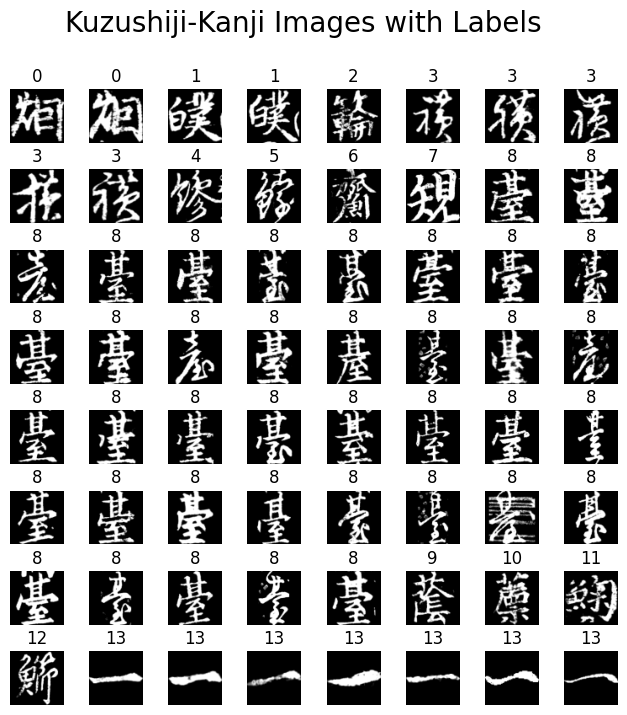

In [10]:
n = 8
fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(8, 8))
fig.suptitle('Kuzushiji-Kanji Images with Labels', fontsize=20)

for i in range(n**2):
    ax = axs[i // n, i % n]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(labels[i])
    ax.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.savefig('images_kanji.png')
plt.show()

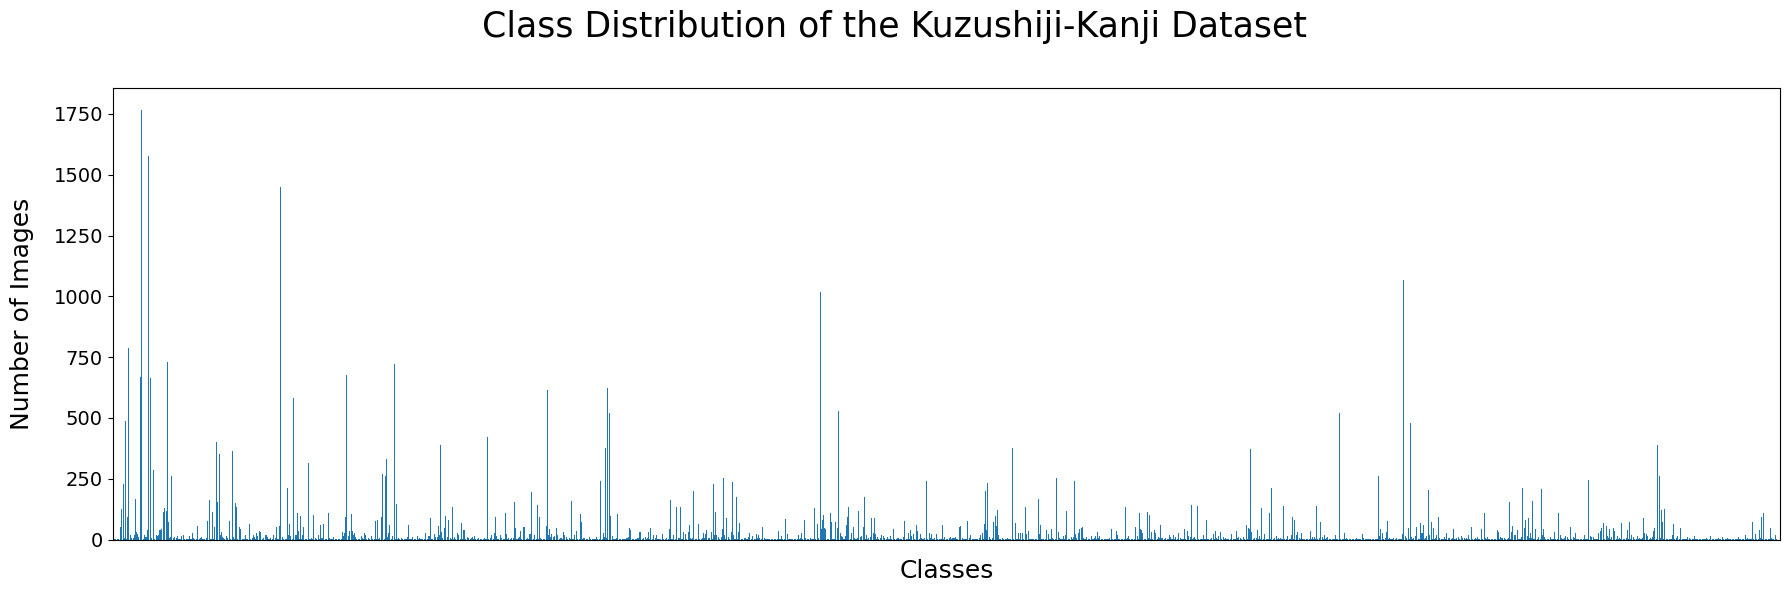

In [11]:
# Plot the data distribution between all classes
label_numbers = pd.Series(labels)
label_values = label_numbers.value_counts(sort=False).sort_index()
fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle('Class Distribution of the Kuzushiji-Kanji Dataset', fontsize=25)
ax.bar(label_values.index, label_values.values)
plt.yticks(fontsize=14)
plt.margins(x=0.001)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_xticks(label_values.index)
ax.set_xlabel('Classes', fontsize=18, labelpad=14)
ax.set_ylabel('Number of Images', fontsize=18, labelpad=14)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('class_distribution_kanji.png', bbox_inches='tight')
plt.show()

## Preset of Arguments

In [7]:
# Adapt these variables if you saved datasets to another location or want change something
balancing = True
batch_size = 128
csv_file = ""
data_dir = "..\\archive\\kkanji\\kkanji2"
data_dir_cmnist = ""
epochs = 50
label = "kanji"
learning_rate = 1e-4
load_from_npz = False
npz_paths = []
save_to_npz = True
resize_shape = (64,64)
upsampling_size = 25
use_grayscale = False

In [12]:
# Get the dataloader that load the data
data_loader_kanji = data_loading.DataLoader(
    data_dir=data_dir,
    balancing=balancing, upsampling_size=upsampling_size,
    load_from_npz=load_from_npz, npz_paths=npz_paths,
    save_to_npz=save_to_npz,
    csv_file=csv_file,
    use_grayscale=use_grayscale,
    label=label,
    resize_shape=resize_shape)

Load data from directory...
140424 files found
Balance data...
Load images and labels from data...
Number of folders for one array: 958
Load from folder 0...
Load from folder 1...
Load from folder 2...
Load from folder 3...
Load from folder 4...
Load from folder 5...
Load from folder 6...
Load from folder 7...
Load from folder 8...
Load from folder 9...
Load from folder 10...
Load from folder 11...
Load from folder 12...
Load from folder 13...
Load from folder 14...
Load from folder 15...
Load from folder 16...
Load from folder 17...
Load from folder 18...
Load from folder 19...
Load from folder 20...
Load from folder 21...
Load from folder 22...
Load from folder 23...
Load from folder 24...
Load from folder 25...
Load from folder 26...
Load from folder 27...
Load from folder 28...
Load from folder 29...
Load from folder 30...
Load from folder 31...
Load from folder 32...
Load from folder 33...
Load from folder 34...
Load from folder 35...
Load from folder 36...
Load from folder 37...


Load from folder 343...
Load from folder 344...
Load from folder 345...
Load from folder 346...
Load from folder 347...
Load from folder 348...
Load from folder 349...
Load from folder 350...
Load from folder 351...
Load from folder 352...
Load from folder 353...
Load from folder 354...
Load from folder 355...
Load from folder 356...
Load from folder 357...
Load from folder 358...
Load from folder 359...
Load from folder 360...
Load from folder 361...
Load from folder 362...
Load from folder 363...
Load from folder 364...
Load from folder 365...
Load from folder 366...
Load from folder 367...
Load from folder 368...
Load from folder 369...
Load from folder 370...
Load from folder 371...
Load from folder 372...
Load from folder 373...
Load from folder 374...
Load from folder 375...
Load from folder 376...
Load from folder 377...
Load from folder 378...
Load from folder 379...
Load from folder 380...
Load from folder 381...
Load from folder 382...
Load from folder 383...
Load from folder

Load from folder 686...
Load from folder 687...
Load from folder 688...
Load from folder 689...
Load from folder 690...
Load from folder 691...
Load from folder 692...
Load from folder 693...
Load from folder 694...
Load from folder 695...
Load from folder 696...
Load from folder 697...
Load from folder 698...
Load from folder 699...
Load from folder 700...
Load from folder 701...
Load from folder 702...
Load from folder 703...
Load from folder 704...
Load from folder 705...
Load from folder 706...
Load from folder 707...
Load from folder 708...
Load from folder 709...
Load from folder 710...
Load from folder 711...
Load from folder 712...
Load from folder 713...
Load from folder 714...
Load from folder 715...
Load from folder 716...
Load from folder 717...
Load from folder 718...
Load from folder 719...
Load from folder 720...
Load from folder 721...
Load from folder 722...
Load from folder 723...
Load from folder 724...
Load from folder 725...
Load from folder 726...
Load from folder

Load from folder 1031...
Load from folder 1032...
Load from folder 1033...
Load from folder 1034...
Load from folder 1035...
Load from folder 1036...
Load from folder 1037...
Load from folder 1038...
Load from folder 1039...
Load from folder 1040...
Load from folder 1041...
Load from folder 1042...
Load from folder 1043...
Load from folder 1044...
Load from folder 1045...
Load from folder 1046...
Load from folder 1047...
Load from folder 1048...
Load from folder 1049...
Load from folder 1050...
Load from folder 1051...
Load from folder 1052...
Load from folder 1053...
Load from folder 1054...
Load from folder 1055...
Load from folder 1056...
Load from folder 1057...
Load from folder 1058...
Load from folder 1059...
Load from folder 1060...
Load from folder 1061...
Load from folder 1062...
Load from folder 1063...
Load from folder 1064...
Load from folder 1065...
Load from folder 1066...
Load from folder 1067...
Load from folder 1068...
Load from folder 1069...
Load from folder 1070...


Load from folder 1360...
Load from folder 1361...
Load from folder 1362...
Load from folder 1363...
Load from folder 1364...
Load from folder 1365...
Load from folder 1366...
Load from folder 1367...
Load from folder 1368...
Load from folder 1369...
Load from folder 1370...
Load from folder 1371...
Load from folder 1372...
Load from folder 1373...
Load from folder 1374...
Load from folder 1375...
Load from folder 1376...
Load from folder 1377...
Load from folder 1378...
Load from folder 1379...
Load from folder 1380...
Load from folder 1381...
Load from folder 1382...
Load from folder 1383...
Load from folder 1384...
Load from folder 1385...
Load from folder 1386...
Load from folder 1387...
Load from folder 1388...
Load from folder 1389...
Load from folder 1390...
Load from folder 1391...
Load from folder 1392...
Load from folder 1393...
Load from folder 1394...
Load from folder 1395...
Load from folder 1396...
Load from folder 1397...
Load from folder 1398...
Load from folder 1399...


Load from folder 1689...
Load from folder 1690...
Load from folder 1691...
Load from folder 1692...
Load from folder 1693...
Load from folder 1694...
Load from folder 1695...
Load from folder 1696...
Load from folder 1697...
Load from folder 1698...
Load from folder 1699...
Load from folder 1700...
Load from folder 1701...
Load from folder 1702...
Load from folder 1703...
Load from folder 1704...
Load from folder 1705...
Load from folder 1706...
Load from folder 1707...
Load from folder 1708...
Load from folder 1709...
Load from folder 1710...
Load from folder 1711...
Load from folder 1712...
Load from folder 1713...
Load from folder 1714...
Load from folder 1715...
Load from folder 1716...
Load from folder 1717...
Load from folder 1718...
Load from folder 1719...
Load from folder 1720...
Load from folder 1721...
Load from folder 1722...
Load from folder 1723...
Load from folder 1724...
Load from folder 1725...
Load from folder 1726...
Load from folder 1727...
Load from folder 1728...


Load from folder 2020...
Load from folder 2021...
Load from folder 2022...
Load from folder 2023...
Load from folder 2024...
Load from folder 2025...
Load from folder 2026...
Load from folder 2027...
Load from folder 2028...
Load from folder 2029...
Load from folder 2030...
Load from folder 2031...
Load from folder 2032...
Load from folder 2033...
Load from folder 2034...
Load from folder 2035...
Load from folder 2036...
Load from folder 2037...
Load from folder 2038...
Load from folder 2039...
Load from folder 2040...
Load from folder 2041...
Load from folder 2042...
Load from folder 2043...
Load from folder 2044...
Load from folder 2045...
Load from folder 2046...
Load from folder 2047...
Load from folder 2048...
Load from folder 2049...
Load from folder 2050...
Load from folder 2051...
Load from folder 2052...
Load from folder 2053...
Load from folder 2054...
Load from folder 2055...
Load from folder 2056...
Load from folder 2057...
Load from folder 2058...
Load from folder 2059...


Load from folder 2350...
Load from folder 2351...
Load from folder 2352...
Load from folder 2353...
Load from folder 2354...
Load from folder 2355...
Load from folder 2356...
Load from folder 2357...
Load from folder 2358...
Load from folder 2359...
Load from folder 2360...
Load from folder 2361...
Load from folder 2362...
Load from folder 2363...
Load from folder 2364...
Load from folder 2365...
Load from folder 2366...
Load from folder 2367...
Load from folder 2368...
Load from folder 2369...
Load from folder 2370...
Load from folder 2371...
Load from folder 2372...
Load from folder 2373...
Load from folder 2374...
Load from folder 2375...
Load from folder 2376...
Load from folder 2377...
Load from folder 2378...
Load from folder 2379...
Load from folder 2380...
Load from folder 2381...
Load from folder 2382...
Load from folder 2383...
Load from folder 2384...
Load from folder 2385...
Load from folder 2386...
Load from folder 2387...
Load from folder 2388...
Load from folder 2389...


Load from folder 2679...
Load from folder 2680...
Load from folder 2681...
Load from folder 2682...
Load from folder 2683...
Load from folder 2684...
Load from folder 2685...
Load from folder 2686...
Load from folder 2687...
Load from folder 2688...
Load from folder 2689...
Load from folder 2690...
Load from folder 2691...
Load from folder 2692...
Load from folder 2693...
Load from folder 2694...
Load from folder 2695...
Load from folder 2696...
Load from folder 2697...
Load from folder 2698...
Load from folder 2699...
Load from folder 2700...
Load from folder 2701...
Load from folder 2702...
Load from folder 2703...
Load from folder 2704...
Load from folder 2705...
Load from folder 2706...
Load from folder 2707...
Load from folder 2708...
Load from folder 2709...
Load from folder 2710...
Load from folder 2711...
Load from folder 2712...
Load from folder 2713...
Load from folder 2714...
Load from folder 2715...
Load from folder 2716...
Load from folder 2717...
Load from folder 2718...


Load from folder 3009...
Load from folder 3010...
Load from folder 3011...
Load from folder 3012...
Load from folder 3013...
Load from folder 3014...
Load from folder 3015...
Load from folder 3016...
Load from folder 3017...
Load from folder 3018...
Load from folder 3019...
Load from folder 3020...
Load from folder 3021...
Load from folder 3022...
Load from folder 3023...
Load from folder 3024...
Load from folder 3025...
Load from folder 3026...
Load from folder 3027...
Load from folder 3028...
Load from folder 3029...
Load from folder 3030...
Load from folder 3031...
Load from folder 3032...
Load from folder 3033...
Load from folder 3034...
Load from folder 3035...
Load from folder 3036...
Load from folder 3037...
Load from folder 3038...
Load from folder 3039...
Load from folder 3040...
Load from folder 3041...
Load from folder 3042...
Load from folder 3043...
Load from folder 3044...
Load from folder 3045...
Load from folder 3046...
Load from folder 3047...
Load from folder 3048...


Load from folder 3337...
Load from folder 3338...
Load from folder 3339...
Load from folder 3340...
Load from folder 3341...
Load from folder 3342...
Load from folder 3343...
Load from folder 3344...
Load from folder 3345...
Load from folder 3346...
Load from folder 3347...
Load from folder 3348...
Load from folder 3349...
Load from folder 3350...
Load from folder 3351...
Load from folder 3352...
Load from folder 3353...
Load from folder 3354...
Load from folder 3355...
Load from folder 3356...
Load from folder 3357...
Load from folder 3358...
Load from folder 3359...
Load from folder 3360...
Load from folder 3361...
Load from folder 3362...
Load from folder 3363...
Load from folder 3364...
Load from folder 3365...
Load from folder 3366...
Load from folder 3367...
Load from folder 3368...
Load from folder 3369...
Load from folder 3370...
Load from folder 3371...
Load from folder 3372...
Load from folder 3373...
Load from folder 3374...
Load from folder 3375...
Load from folder 3376...


Load from folder 3666...
Load from folder 3667...
Load from folder 3668...
Load from folder 3669...
Load from folder 3670...
Load from folder 3671...
Load from folder 3672...
Load from folder 3673...
Load from folder 3674...
Load from folder 3675...
Load from folder 3676...
Load from folder 3677...
Load from folder 3678...
Load from folder 3679...
Load from folder 3680...
Load from folder 3681...
Load from folder 3682...
Load from folder 3683...
Load from folder 3684...
Load from folder 3685...
Load from folder 3686...
Load from folder 3687...
Load from folder 3688...
Load from folder 3689...
Load from folder 3690...
Load from folder 3691...
Load from folder 3692...
Load from folder 3693...
Load from folder 3694...
Load from folder 3695...
Load from folder 3696...
Load from folder 3697...
Load from folder 3698...
Load from folder 3699...
Load from folder 3700...
Load from folder 3701...
Load from folder 3702...
Load from folder 3703...
Load from folder 3704...
Load from folder 3705...


In [13]:
# Get the properties of the dataloader
input_shape = data_loader_kanji.input_shape
num_classes = data_loader_kanji.num_classes
train_images = data_loader_kanji.train_images
train_labels = data_loader_kanji.train_labels
validation_images = data_loader_kanji.validation_images
validation_labels = data_loader_kanji.validation_labels
test_images = data_loader_kanji.test_images
test_labels = data_loader_kanji.test_labels

In [14]:
print("Classes:", num_classes)
print(f"Number of train images: {len(train_images)} where each sample is of size: {train_images.shape[1:]}")
print(f"Number of validation images: {len(validation_images)} where each sample is of size: {validation_images.shape[1:]}")
print(f"Number of test images: {len(test_images)} where each sample is of size: {test_images.shape[1:]}")

Classes: 3832
Number of train images: 77598 where each sample is of size: (64, 64, 1)
Number of validation images: 8622 where each sample is of size: (64, 64, 1)
Number of test images: 9580 where each sample is of size: (64, 64, 1)


## Train a Base CNN Model on the Kanji Dataset

In [26]:
model, history = train.train_model(data_loader_kanji, batch_size, epochs, learning_rate, label)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

607/607 [==============================] - 24s 39ms/step - loss: 0.3294 - accuracy: 0.9711 - val_loss: 0.7342 - val_accuracy: 0.8994
Epoch 36/50
607/607 [==============================] - 24s 40ms/step - loss: 0.3252 - accuracy: 0.9708 - val_loss: 0.7256 - val_accuracy: 0.8992
Epoch 37/50
607/607 [==============================] - 23s 38ms/step - loss: 0.3202 - accuracy: 0.9708 - val_loss: 0.7127 - val_accuracy: 0.9065
Epoch 38/50
607/607 [==============================] - 23s 38ms/step - loss: 0.3088 - accuracy: 0.9730 - val_loss: 0.7159 - val_accuracy: 0.9033
Epoch 39/50
607/607 [==============================] - 24s 39ms/step - loss: 0.2994 - accuracy: 0.9748 - val_loss: 0.6853 - val_accuracy: 0.9096
Epoch 40/50
607/607 [==============================] - 24s 39ms/step - loss: 0.2946 - accuracy: 0.9747 - val_loss: 0.7286 - val_accuracy: 0.9016
Epoch 41/50
607/607 [==============================] - 24s 39ms/step - loss: 0.2943 - accuracy: 0.9731 - val_loss: 0.7031 - val_accuracy: 0.90

## Plot and Evaluate the Trained Model

In [27]:
test.plot_accuracy_and_loss(history, label)
test.evaluate_model(model, test_images, test_labels, batch_size)
test.plot_predictions(model, test_images, test_labels, resize_shape, label)

Plot loss and accuracy...
Evaluate model on test data...
75/75 [==============================] - 1s 17ms/step - loss: 0.6538 - accuracy: 0.9108
The test loss is: 0.6538242697715759
The test accuracy is: 0.9107515811920166



75/75 [==============================] - 1s 10ms/step
The Precision is: 0.9088483157113332
The Recall is: 0.9042994747218143
The F1-score is: 0.8925897047143961
Plot some output predictions...
2/2 [==============================] - 0s 3ms/step


If the transfer learning was successful, you should see accuracy_kanji.png, loss_kanji.png and predictions_kanji.png as well as a saved model file named something like kanji_model_Aug30-2022-10-52-42.h5 and the saved train and test images and labels.

## Load a Local Pretrained Model

In [29]:
# Adapt the following line with the correct path of the local pretrained model
model_path = "kanji_model_Aug-31-2022-21-47-17.h5"

# Load the model
model = keras.models.load_model(model_path)

## Transfer Learning on Chinese-MNIST Dataset using a Local Pretrained Model

In [30]:
# To use a local pretrained model we have to update some variables to get the right dataloader
balancing = False       # We don't want to balance it because the dataset is balanced
csv_file = "..\\chinese-MNIST\\chinese_mnist.csv"
data_dir_cmnist = "..\\chinese-MNIST\\data\\data"
label = "cmnist"

In [31]:
# Create a new dataloader of the Chinese-MNIST dataset
data_loader_cmnist = data_loading.DataLoader(
    data_dir=data_dir_cmnist,
    balancing=balancing, upsampling_size=upsampling_size,
    load_from_npz=load_from_npz, npz_paths=npz_paths,
    save_to_npz=save_to_npz,
    csv_file=csv_file,
    use_grayscale=use_grayscale,
    label=label,
    resize_shape=resize_shape)

Load data from directory with csv file...
15000 files found
Load images and labels from data...
Number of folders for one array: 3
Load from folder 0...
Load from folder 1...
Load from folder 2...
Load from folder 3...
Load from folder 4...
Load from folder 5...
Load from folder 6...
Load from folder 7...
Load from folder 8...
Load from folder 9...
Load from folder 10...
Load from folder 11...
Load from folder 12...
Load from folder 13...
Load from folder 14...

Number of samples: 15000 where each sample is of size: (64, 64)

Elapsed time for data preparation: 00:02:02

Number of classes: 15
Data splitted in train and test sets
Save train and test images and labels to npz files...
Train set splitted in train and validation sets

Train images dimensions: (12150, 64, 64, 1)

Validation images dimensions: (1350, 64, 64, 1)

Test images dimensions: (1500, 64, 64, 1)


In [32]:
# Use the loaded model and the dataloader for transfer learning
transfer_learning.transfer_learning_with_local_model(model, data_loader_cmnist, batch_size, epochs, learning_rate, label)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 sequential (Sequential)     (None, 3832)              912152    
                                                                 
 dense_2 (Dense)             (None, 1024)              3924992   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0     

95/95 [==============================] - 2s 18ms/step - loss: 0.7131 - accuracy: 0.8121 - val_loss: 0.7053 - val_accuracy: 0.8111
Epoch 49/50
95/95 [==============================] - 2s 17ms/step - loss: 0.7114 - accuracy: 0.8114 - val_loss: 0.6981 - val_accuracy: 0.8193
Epoch 50/50
95/95 [==============================] - 2s 17ms/step - loss: 0.7028 - accuracy: 0.8186 - val_loss: 0.6993 - val_accuracy: 0.8156

Elapsed time for training: 00:01:31
Plot loss and accuracy...
Evaluate model on test data...
12/12 [==============================] - 1s 43ms/step - loss: 0.7143 - accuracy: 0.8153
The test loss is: 0.7143165469169617
The test accuracy is: 0.8153333067893982



12/12 [==============================] - 0s 11ms/step
The Precision is: 0.8197436796529228
The Recall is: 0.8159249219725215
The F1-score is: 0.8143977073199054
Plot some output predictions...
2/2 [==============================] - 0s 7ms/step


If the transfer learning was successful, you should see accuracy_cmnist.png, loss_cmnist.png and predictions_cmnist.png as well as a saved model file named something like cmnist_model_Aug30-2022-11-03-33.h5 and the saved train and test images and labels.

## Transfer Learning on Chinese-MNIST Dataset using a Pretained Model

In [33]:
# To use a pretrained model like ResNet50 we have to update some parameter to get the right dataloader
batch_size = 64
label = "pretrained_resnet50"
resize_shape = (224,224)    # ResNet50 accepts only images of size 224 x 224 so we need to resize the images
use_grayscale = True        # ResNet50 was trained with RGB images so we have to transfer 
                            # the grayscale images of the Chinese-MNIST dataset to RGB images

In [34]:
# Create a new dataloader of the Chinese-MNIST dataset for the pretrained model
data_loader_cmnist_pretrained = data_loading.DataLoader(
    data_dir=data_dir_cmnist,
    balancing=balancing, upsampling_size=upsampling_size,
    load_from_npz=load_from_npz, npz_paths=npz_paths,
    save_to_npz=save_to_npz,
    csv_file=csv_file,
    use_grayscale=use_grayscale,
    label=label,
    resize_shape=resize_shape)

Load data from directory with csv file...
15000 files found
Load images and labels from data...
Number of folders for one array: 3
Load from folder 0...
Load from folder 1...
Load from folder 2...
Load from folder 3...
Load from folder 4...
Load from folder 5...
Load from folder 6...
Load from folder 7...
Load from folder 8...
Load from folder 9...
Load from folder 10...
Load from folder 11...
Load from folder 12...
Load from folder 13...
Load from folder 14...

Number of samples: 15000 where each sample is of size: (224, 224)

Elapsed time for data preparation: 00:08:11

Number of classes: 15
Data splitted in train and test sets
Save train and test images and labels to npz files...
Train set splitted in train and validation sets

Train images dimensions: (12150, 224, 224, 3)

Validation images dimensions: (1350, 224, 224, 3)

Test images dimensions: (1500, 224, 224, 3)


In [35]:
# Use the pretrained model ResNet50 and the dataloader for transfer learning
transfer_learning.transfer_learning_with_pretrained_model('resnet50', data_loader_cmnist_pretrained, batch_size, epochs, learning_rate)

### An error occurs here because it runs out of memory. 
### Our PCs have not enough RAM when we create this demo file. 
### But it should work on a PC with better hardware.

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

If the transfer learning was successful, you should see accuracy_pretrained_resnet50.png, loss_pretrained_resnet50.png and predictions_pretrained_resnet50.png as well as a saved model file named something like pretrained_resnet50_model_Aug30-2022-12-10-23.h5 and the saved train and test images and labels.